<a href="https://colab.research.google.com/github/mini3713/mini3713/blob/main/occupancy/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA

> 글꼴다운로드

In [2]:
# 설치후 런타임 다시시작 > 이 셀을 건너뛰고 시작한다 
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.ticker as tkr

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
onehot = pd.read_excel('/content/Time use survey_Korea_2019_onehot_only.xlsx')
onehot = onehot.drop(['Unnamed: 0'], axis=1)

In [4]:
feature = pd.read_csv("/content/2019_시간대_전체_20230105_67778.csv", encoding="cp949")

In [5]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52182 entries, 0 to 52181
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   행정구역시도코드  52182 non-null  int64  
 1   가구일련번호    52182 non-null  int64  
 2   평토일구분코드   52182 non-null  int64  
 3   전체가구원수    52182 non-null  int64  
 4   연령코드      52182 non-null  int64  
 5   경제활동상태코드  49206 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 2.4 MB


> 결측치 채우기  
> * 결측치 모두 10대로 확인되어 경제활동상태코드 3으로 반영함 

In [6]:
feature['경제활동상태코드'] = feature['경제활동상태코드'].fillna(3)
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52182 entries, 0 to 52181
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   행정구역시도코드  52182 non-null  int64  
 1   가구일련번호    52182 non-null  int64  
 2   평토일구분코드   52182 non-null  int64  
 3   전체가구원수    52182 non-null  int64  
 4   연령코드      52182 non-null  int64  
 5   경제활동상태코드  52182 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 2.4 MB


In [7]:
total = pd.concat([feature, onehot], axis=1)
total.head()

,행정구역시도코드,가구일련번호,평토일구분코드,전체가구원수,연령코드,경제활동상태코드,(주행동시간대) 오전 00:00,(주행동시간대) 오전 00:10,(주행동시간대) 오전 00:20,(주행동시간대) 오전 00:30,...,(주행동시간대) 오후 10:20,(주행동시간대) 오후 10:30,(주행동시간대) 오후 10:40,(주행동시간대) 오후 10:50,(주행동시간대) 오후 11:00,(주행동시간대) 오후 11:10,(주행동시간대) 오후 11:20,(주행동시간대) 오후 11:30,(주행동시간대) 오후 11:40,(주행동시간대) 오후 11:50
0,11,2165,1,7,1,1.0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,11,2165,1,7,1,3.0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,11,2165,1,7,4,1.0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,11,2165,1,7,4,1.0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,11,2165,1,7,6,3.0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [8]:
total2 = total.iloc[::2,:]
total2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26091 entries, 0 to 52180
Columns: 150 entries, 행정구역시도코드 to (주행동시간대) 오후 11:50
dtypes: float64(1), int64(149)
memory usage: 29.9 MB


In [9]:
sns.set_style('whitegrid')

In [10]:
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='whitegrid')

plt.rcParams["figure.figsize"] = (10,7)
plt.rc('font', size=10)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=11)
plt.rc('figure', titlesize=15)

## 데이터 특성 살펴보기  
> 막대그래프

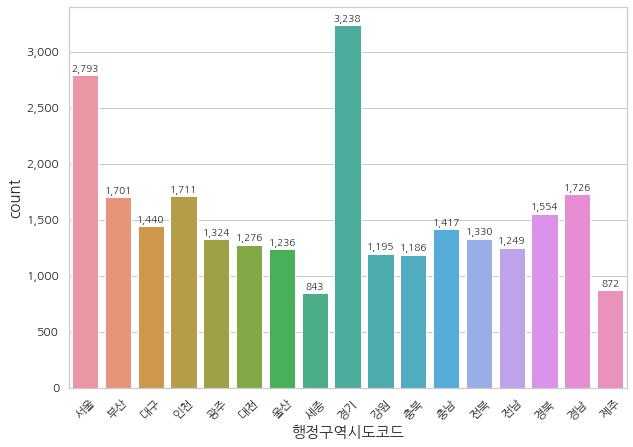

In [11]:
bar = sns.countplot(x="행정구역시도코드", data=total2)
bar.set_xticklabels(['서울','부산','대구','인천','광주','대전','울산','세종','경기','강원','충북','충남','전북','전남','경북','경남','제주'], rotation=45)

for p in bar.patches:
  bar.annotate("{:,}".format(int(p.get_height())), (p.get_x()+ p.get_width()/2, p.get_height()), ha='center', va='center', size=10, xytext=(0,6), textcoords='offset points')

### 천단위 콤마 표시(y축)
def yfunc(y, pos):
    s = '{:0,d}'.format(int(y))
    return s
y_format = tkr.FuncFormatter(yfunc)
bar.yaxis.set_major_formatter(y_format)

In [12]:
# seaborn 막대 그래프 너비 설정
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

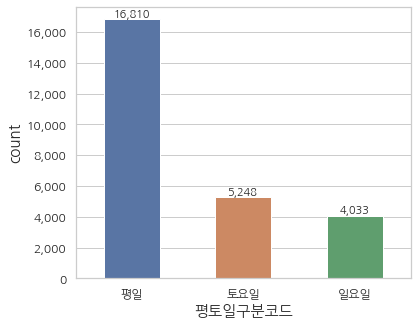

In [13]:
plt.rcParams["figure.figsize"] = (6,5)
bar2 = sns.countplot(x="평토일구분코드", data=total2)
bar2.set_xticklabels(['평일', '토요일', '일요일'])

for p in bar2.patches:
  bar2.annotate("{:,}".format(int(p.get_height())), (p.get_x()+ p.get_width()/2, p.get_height()), ha='center', va='center', size=11, xytext=(0,6), textcoords='offset points')

### 천단위 콤마 표시(y축)
def yfunc(y, pos):
    s = '{:0,d}'.format(int(y))
    return s
y_format = tkr.FuncFormatter(yfunc)
bar2.yaxis.set_major_formatter(y_format)

change_width(bar2, .5)  # 막대 너비 설정

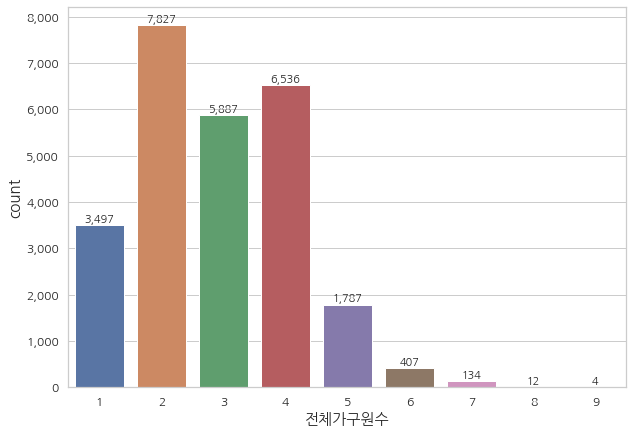

In [14]:
plt.rcParams["figure.figsize"] = (10,7)
bar3 = sns.countplot(x="전체가구원수", data=total2)

for p in bar3.patches:
  bar3.annotate("{:,}".format(int(p.get_height())), (p.get_x()+ p.get_width()/2, p.get_height()), ha='center', va='center', size=11, xytext=(0,6), textcoords='offset points')

### 천단위 콤마 표시(y축)
def yfunc(y, pos):
    s = '{:0,d}'.format(int(y))
    return s
y_format = tkr.FuncFormatter(yfunc)
bar3.yaxis.set_major_formatter(y_format)

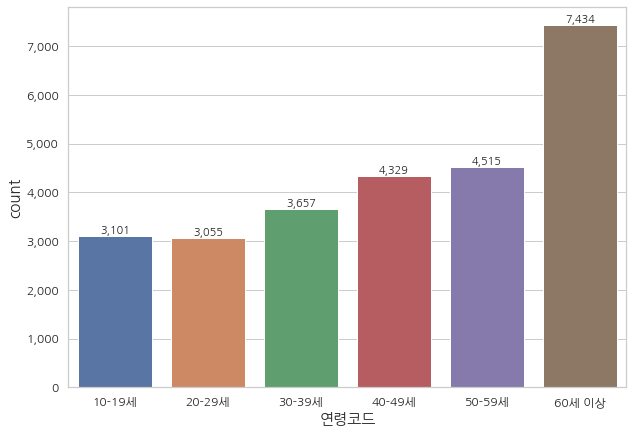

In [15]:
bar4 = sns.countplot(x="연령코드", data=total2)
bar4.set_xticklabels(['10-19세','20-29세','30-39세','40-49세','50-59세','60세 이상'])

for p in bar4.patches:
  bar4.annotate("{:,}".format(int(p.get_height())), (p.get_x()+ p.get_width()/2, p.get_height()), ha='center', va='center', size=11, xytext=(0,6), textcoords='offset points')

### 천단위 콤마 표시(y축)
def yfunc(y, pos):
    s = '{:0,d}'.format(int(y))
    return s
y_format = tkr.FuncFormatter(yfunc)
bar4.yaxis.set_major_formatter(y_format)

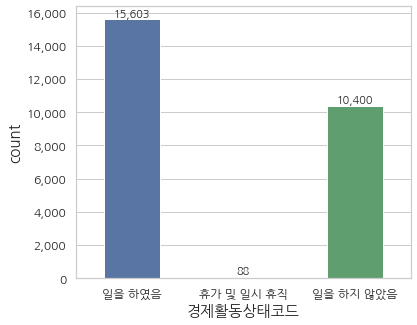

In [16]:
plt.rcParams["figure.figsize"] = (6,5)
bar5 = sns.countplot(x="경제활동상태코드", data=total2)
bar5.set_xticklabels(['일을 하였음', '휴가 및 일시 휴직', '일을 하지 않았음'])

for p in bar5.patches:
  bar5.annotate("{:,}".format(int(p.get_height())), (p.get_x()+ p.get_width()/2, p.get_height()), ha='center', va='center', size=11, xytext=(0,6), textcoords='offset points')

### 천단위 콤마 표시(y축)
def yfunc(y, pos):
    s = '{:0,d}'.format(int(y))
    return s
y_format = tkr.FuncFormatter(yfunc)
bar5.yaxis.set_major_formatter(y_format)

change_width(bar5, .5)  # 막대 너비 설정

> 시계열 그래프

In [19]:
# total2.to_excel(excel_writer='Time use survey_Korea_2019_only_even.xlsx')

In [57]:
### column별 분류에 따른 평균을 꺾은선그래프로 시각화해주는 함수
def visualize_column_unique(k):    
 
  even = pd.read_excel('/content/Time use survey_Korea_2019_only_even.xlsx')
  even = even.drop(['Unnamed: 0'], axis=1)
  oh = even.iloc[:,6:]
  ts = pd.date_range('2019-07-01 00:00:00', '2019-07-01 23:50:00', freq='10min')

  # 원하는 칼럼 선택/고유값 추출
  column = even.iloc[:,k]
  unique_list = even.iloc[:,k].unique()

  plt.figure(figsize=(18,4))

  for i in unique_list: 

    # 고유값에 따른 라벨 추출 
    col_val = column[(column == i)]
    label = col_val.index.tolist()    

    # 시계열 데이터에 라벨 전달하여 데이터 추출
    # 고유값에 따른 시계열 평균 계산  
    oh_label = oh.loc[label]
    oh_rate = oh_label.sum(axis=0) / len(oh_label)
    
    plt.plot(ts, oh_rate, label=f'{i}')
    plt.xlabel('Time')
    plt.ylabel('Occupancy')
    plt.legend()

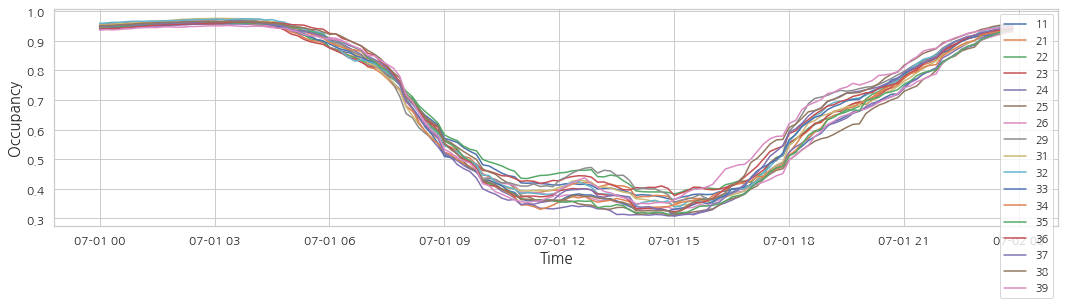

In [59]:
visualize_column_unique(0)

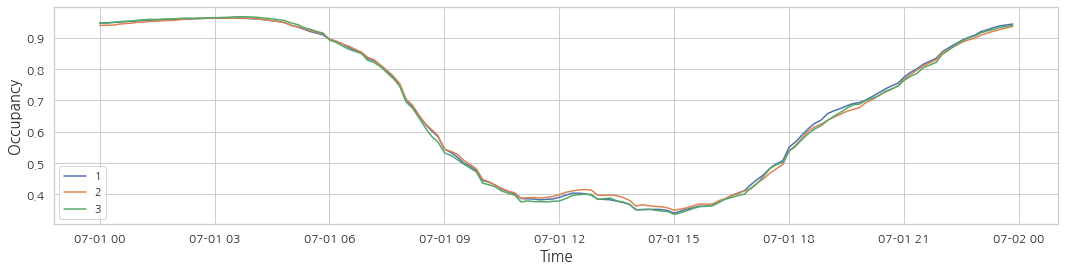

In [58]:
visualize_column_unique(2)

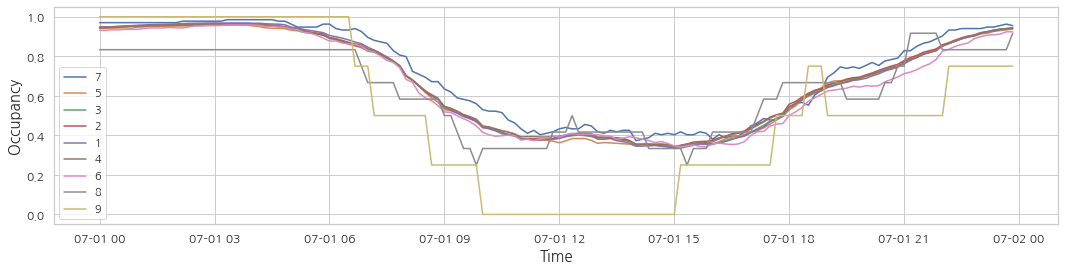

In [61]:
visualize_column_unique(3)

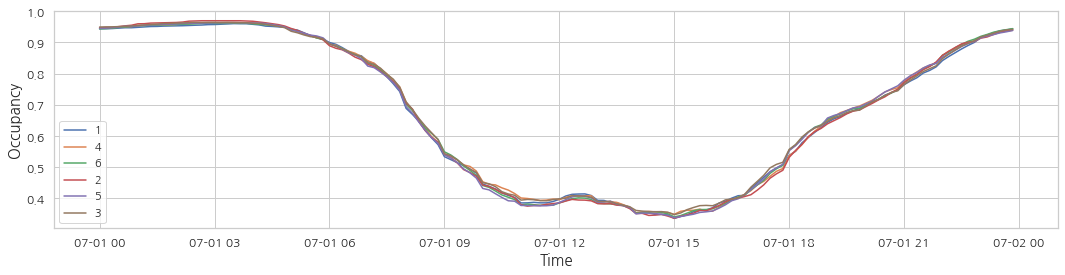

In [62]:
visualize_column_unique(4)

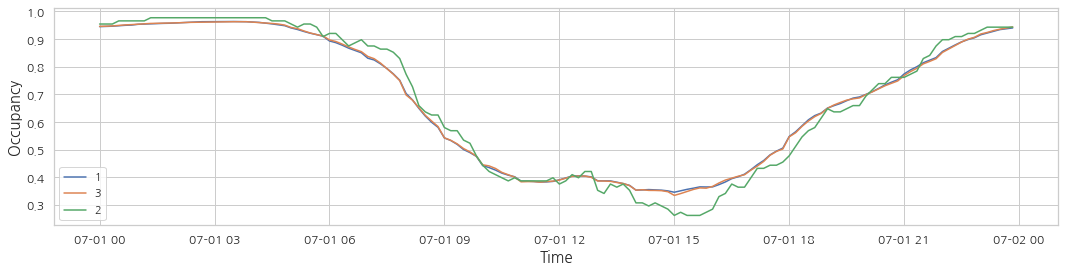

In [63]:
visualize_column_unique(5)

In [ ]:
### column별 고유값에 따라 boxplot
def visualize_column_boxplot(k):    
 
  even = pd.read_excel('/content/Time use survey_Korea_2019_only_even.xlsx')
  even = even.drop(['Unnamed: 0'], axis=1)
  oh = even.iloc[:,6:]
  ts = pd.date_range('2019-07-01 00:00:00', '2019-07-01 23:50:00', freq='10min')

  # 원하는 칼럼 선택/고유값 추출
  column = even.iloc[:,k]
  unique_list = even.iloc[:,k].unique()

  # 고유값 갯수만큼 그래프 생성
  n_unique = len(unique_list)
  fig, axs = plt.subplots(figsize=(18*n_unique, 4), nrows=1, ncols=n_unique)

  for i in unique_list: 

    # 고유값에 따른 라벨 추출 
    col_val = column[(column == i)]
    label = col_val.index.tolist()    

    # 시계열 데이터에 라벨 전달하여 데이터 추출
    oh_label = oh.loc[label]

    oh_label.boxplot()
    
    plt.plot(ts, oh_rate, label=f'{i}')
    plt.xlabel('Time')
    plt.ylabel('Occupancy')

In [64]:
even = pd.read_excel('/content/Time use survey_Korea_2019_only_even.xlsx')
even = even.drop(['Unnamed: 0'], axis=1)
oh = even.iloc[:6,6:]
ts = pd.date_range('2019-07-01 00:00:00', '2019-07-01 23:50:00', freq='10min')